# Sales Analysis

In [2]:
import pandas as pd
import os

In [5]:
files=[file for file in os.listdir('./sales_data')]
all_months_data=pd.DataFrame()

for file in files:
    df=pd.read_csv('./sales_data/'+file)
    all_months_data=pd.concat([all_months_data,df])
    
all_months_data.to_csv("all_data.csv",index=False)

In [11]:
df=pd.read_csv('all_data.csv',parse_dates=True)
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


### clean the data

### drop rows of NaN

In [13]:
df=df.dropna(how='all')

### find 'Or' and delete it

In [19]:
df=df[df['Month']!='Or']

#### convert columns to correct type

In [23]:
df['Quantity Ordered']=pd.to_numeric(df['Quantity Ordered'])
df['Price Each']=pd.to_numeric(df['Price Each'])

### Augment additional columns

### Task 1 : add month column

In [21]:
df['Month']=df['Order Date'].str[0:2]
df['Month']=df['Month'].astype('int32')
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


### Task 2 : add sales column

In [24]:
df['Sales']=df['Quantity Ordered'] * df['Price Each']

In [25]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


### Task 3 : add city column

In [48]:
def get_city(address):
    return address.split(',')[1]

def get_state(address):
    return address.split(',')[2].split(' ')[1]

df['City']=df['Purchase Address'].apply(lambda x:get_city(x)+' '+get_state(x))
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA


### 1. What was the best month for sales ? How much was earned that month?

In [37]:
result=df.groupby('Month').sum()

C:\Users\vedant chaudhary\AppData\Local\Temp\ipykernel_16984\357705278.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  result=df.groupby('Month').sum()


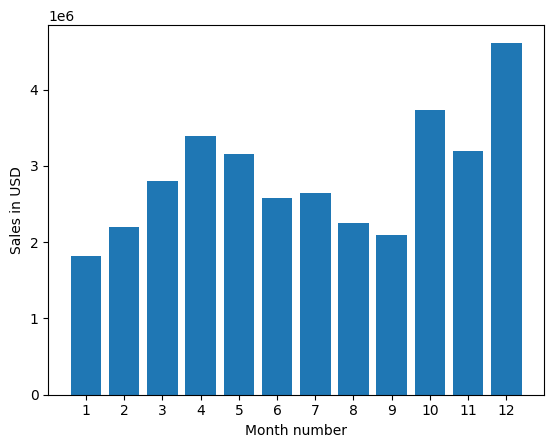

In [42]:
import matplotlib.pyplot as plt
months=range(1,13)
plt.bar(months,result['Sales'])
plt.xticks(months)
plt.ylabel('Sales in USD')
plt.xlabel('Month number')
plt.show()

### 2. What city had highest number of sales?

In [49]:
result=df.groupby('City').sum()

C:\Users\vedant chaudhary\AppData\Local\Temp\ipykernel_16984\1602736383.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  result=df.groupby('City').sum()


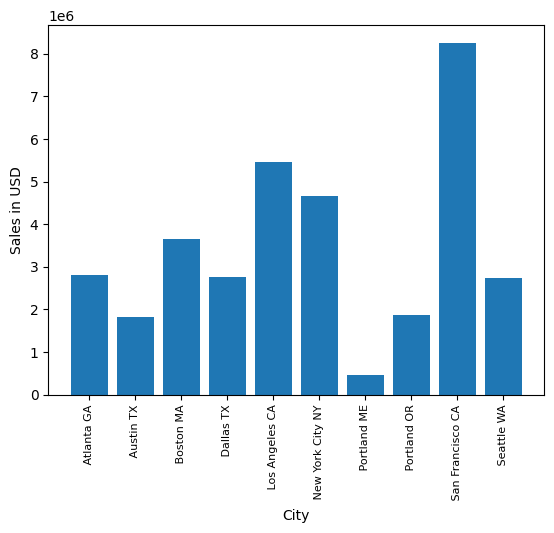

In [62]:
import matplotlib.pyplot as plt
cities=[]
x=df.groupby('City')
for i in x:
    cities.append(i[0])

plt.bar(cities,result['Sales'])
plt.xticks(cities,rotation='vertical',size=8)
plt.ylabel('Sales in USD')
plt.xlabel('City')
plt.show()

### 3. What time should we display advertisements to maximize likelihood of customer's buying product?

In [63]:
df['Order Date']=pd.to_datetime(df['Order Date'])

In [68]:
df['Hour']=df['Order Date'].dt.hour
df['Minute']=df['Order Date'].dt.minute

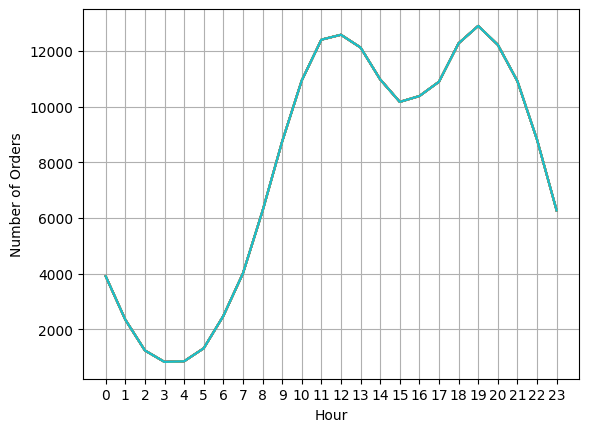

<Figure size 2000x480 with 0 Axes>

In [86]:
hours=[]
x=df.groupby('Hour')
for i in x:
    hours.append(i[0])

    
plt.plot(hours,df.groupby('Hour').count())
plt.xticks(hours)
plt.xlabel('Hour')
plt.ylabel('Number of Orders')
plt.grid()
plt.figure().set_figwidth(20)
plt.show()

### 4. What products are most often sold together?

In [99]:
temp_df=df[df['Order ID'].duplicated(keep=False)]

In [100]:
temp_df['Grouped']=temp_df.groupby('Order ID')['Product'].transform(lambda x:','.join(x))

C:\Users\vedant chaudhary\AppData\Local\Temp\ipykernel_16984\3791890809.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['Grouped']=temp_df.groupby('Order ID')['Product'].transform(lambda x:','.join(x))


In [101]:
temp_df=temp_df[['Order ID','Grouped']].drop_duplicates()

In [102]:
temp_df.head()

,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"


In [69]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX,8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA,22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA,14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,9,27


In [107]:
from itertools import combinations
from collections import Counter

count=Counter()

for row in temp_df['Grouped']:
    row_list=row.split(',')
    count.update(Counter(combinations(row_list,2)))
    
for key,value in count.most_common(10):
    print(key,value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


### 5. What products sold the most?

In [115]:
product_group=df.groupby('Product')['Quantity Ordered'].sum().reset_index()
product_group

,Product,Quantity Ordered
0,20in Monitor,4129
1,27in 4K Gaming Monitor,6244
2,27in FHD Monitor,7550
3,34in Ultrawide Monitor,6199
4,AA Batteries (4-pack),27635
5,AAA Batteries (4-pack),31017
6,Apple Airpods Headphones,15661
7,Bose SoundSport Headphones,13457
8,Flatscreen TV,4819
9,Google Phone,5532


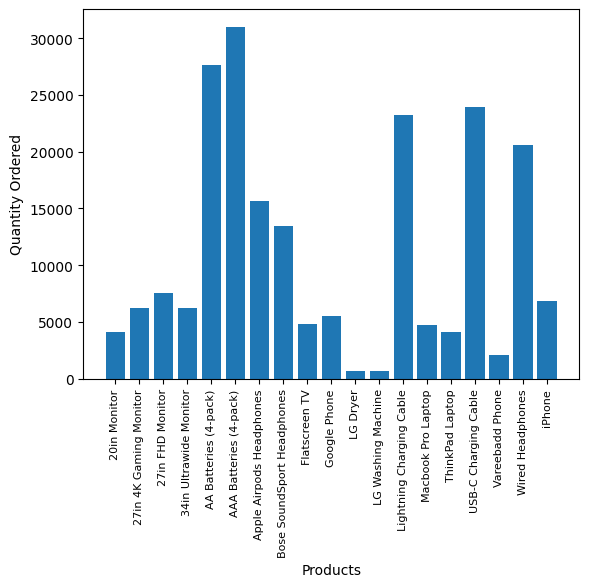

In [119]:
products=[]
x=df.groupby('Product')
for i in x:
    products.append(i[0])
    
plt.bar(products,product_group['Quantity Ordered'])
plt.xlabel('Products')
plt.ylabel('Quantity Ordered')
plt.xticks(products,rotation='vertical',size=8)
plt.show()

In [133]:
prices=df.groupby('Product')['Price Each'].mean()

C:\Users\vedant chaudhary\AppData\Local\Temp\ipykernel_16984\3842583762.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products,rotation='vertical',size=8)


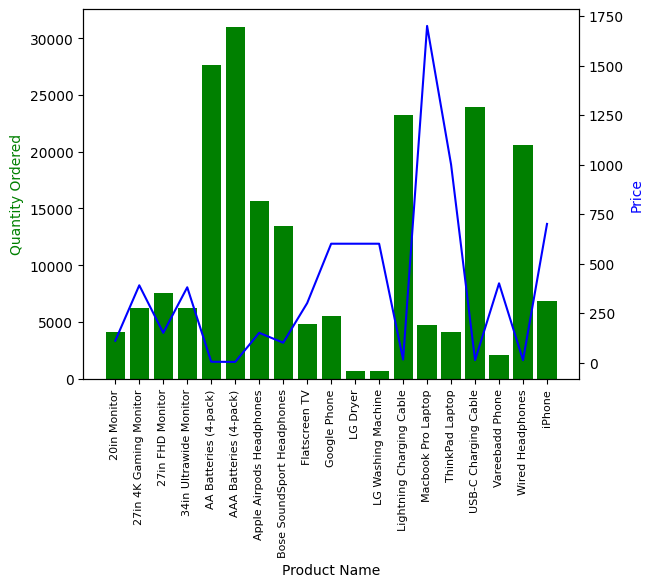

In [135]:
fig,ax1=plt.subplots()

ax2=ax1.twinx()
ax1.bar(products,product_group['Quantity Ordered'],color='g')
ax2.plot(products,prices,'b-')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered',color='g')
ax2.set_ylabel('Price',color='b')
ax1.set_xticklabels(products,rotation='vertical',size=8)
plt.show()